In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanicDF=pd.read_csv('train.csv')#read and display the data
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


questions
    1. who were the passangers on the Titanic (ages,gender,class,etc)
    2. what deck were the passangers on and how does that relate to their class?
    3. where did the passangers come from ?
    4. who was alone and who was with family?
    5. what factors helped someone survive the sinking ?


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

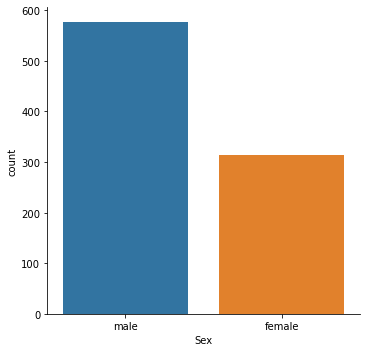

In [120]:
#1. who were the passangers on the Titanic (ages,gender,class,etc)
sns.catplot('Sex',kind='count',data=titanicDF)
#count of the passangers by the Gender

In [31]:
def male_female_child(passenger): #function to generate the value of new columns
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex

In [32]:
titanicDF['person']=titanicDF[['Age','Sex']].apply(male_female_child,axis=1) # adding new columns 'person'

In [33]:
titanicDF.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


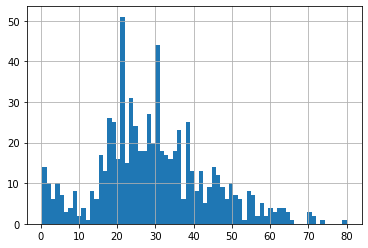

In [44]:
titanicDF['Age'].hist(bins=70)

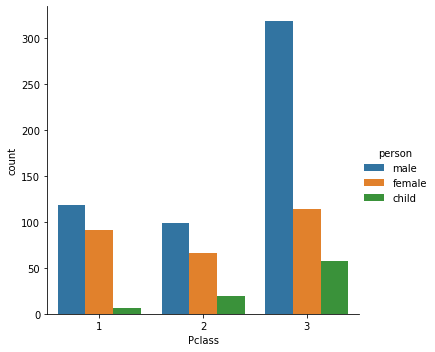

In [45]:
sns.catplot(x='Pclass',kind='count', hue='person', data=titanicDF)
#count of the passanger by Gender+children

In [46]:
titanicDF['Age'].mean()

29.69911764705882

In [47]:
titanicDF['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

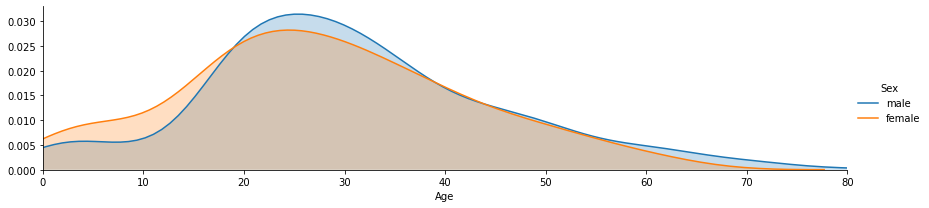

In [52]:
fig=sns.FacetGrid(titanicDF,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanicDF['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

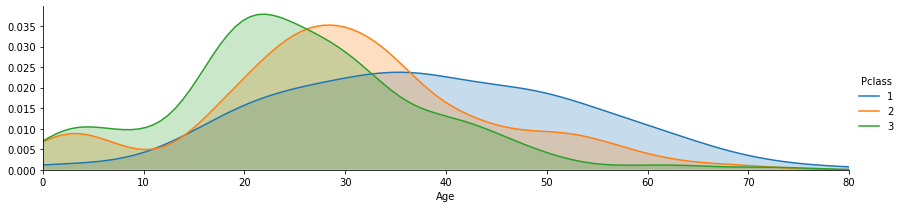

In [54]:
fig=sns.FacetGrid(titanicDF,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanicDF['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [55]:
#2. what deck were the passangers on and how does that relate to their class?
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [57]:
deck=titanicDF['Cabin'].dropna() # drop the null value

In [58]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [60]:
titanicDF['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

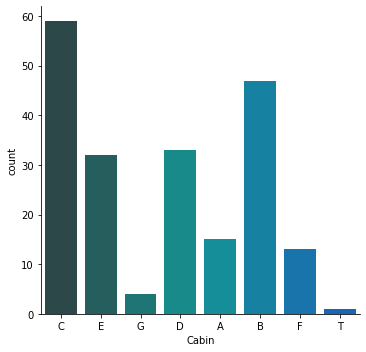

In [69]:
levels=[]
for level in deck:
    levels.append(level[0])
cabinDF=DataFrame(levels)
cabinDF.columns=['Cabin']

sns.catplot(x='Cabin',kind='count',data=cabinDF,palette='winter_d')

In [76]:
cabinDF=cabinDF[cabinDF != 'T'] # remove the 'T'

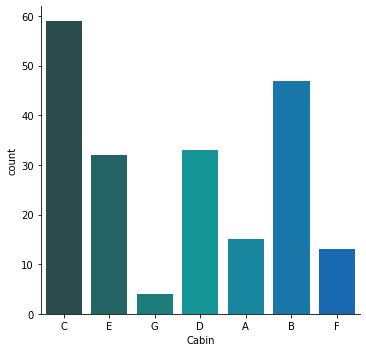

In [77]:
sns.catplot(x='Cabin',kind='count',data=cabinDF,palette='winter_d')
#count of the passanger by the Cabin

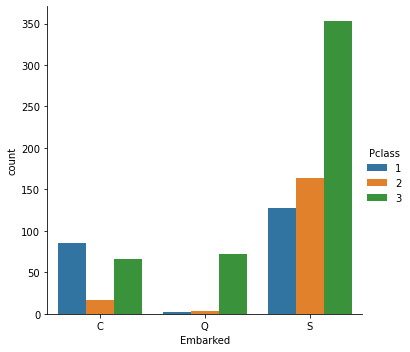

In [79]:
#3. where did the passangers come from ?
sns.catplot(x='Embarked',kind='count',data=titanicDF,hue='Pclass', order=['C','Q','S']) 
#most of the passanger come from Southampton

In [80]:
# 4. who was alone and who was with family?
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [86]:
titanicDF['Family']=titanicDF['SibSp']+titanicDF['Parch']
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,0


In [89]:
titanicDF['Alone'].loc[titanicDF['Alone']>0]='Has Family'# if >0 it mean they has siblings/parents
titanicDF['Alone'].loc[titanicDF['Alone']==0]='Alone'

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Has Family,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Has Family,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Has Family,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,0


In [91]:
del titanicDF['Family']

In [92]:
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Has Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Has Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Has Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Alone         537
Has Family    354
Name: Alone, dtype: int64

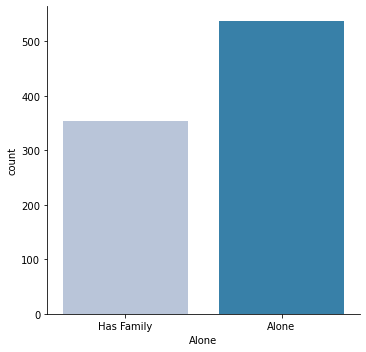

In [96]:
sns.catplot(x='Alone',kind='count',data=titanicDF,palette='PuBu')
titanicDF['Alone'].value_counts()

In [99]:
#5. what factors helped someone survive the sinking ?
titanicDF['Survivor']=titanicDF.Survived.map({0:'No',1:'Yes'})

No     549
Yes    342
Name: Survivor, dtype: int64

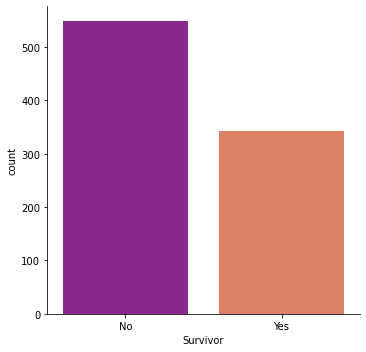

In [101]:
sns.catplot(x='Survivor',kind='count',data=titanicDF,palette='plasma')
titanicDF['Survivor'].value_counts()

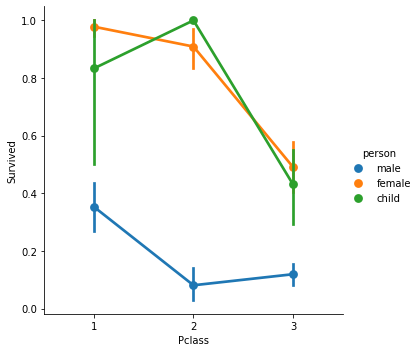

In [109]:
sns.catplot(x='Pclass',y='Survived',hue='person',kind='point',data=titanicDF) 
# it can be see that the male from all class has the lowest percentage of survive

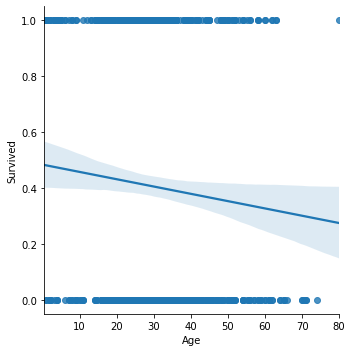

In [106]:
sns.lmplot('Age','Survived',data=titanicDF)

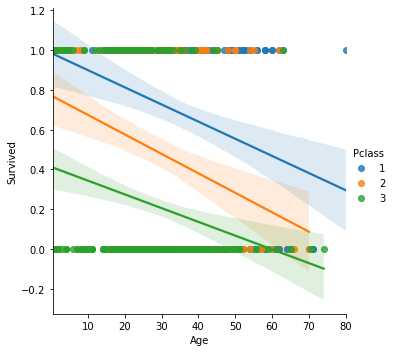

In [107]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanicDF)

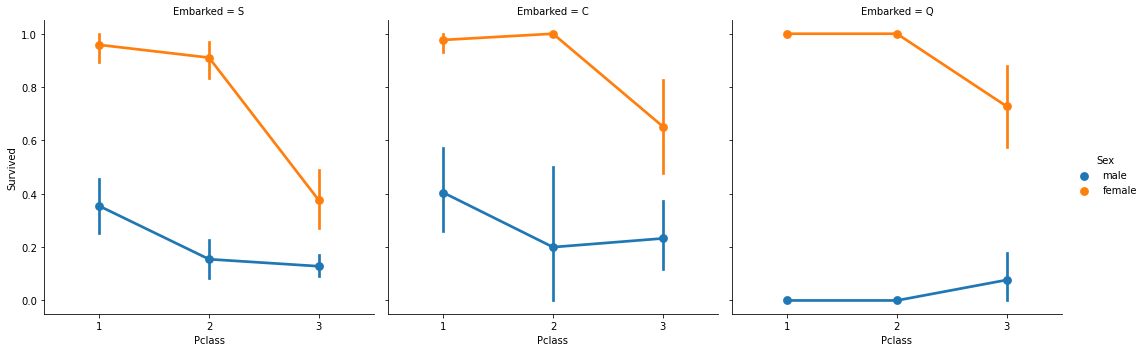

In [113]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',kind='point',data=titanicDF)
#how is the influence of the variables Embarked, Class and Sex, on the level of passenger safety.

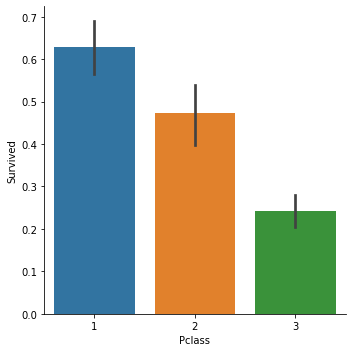

In [118]:
# did the deck have an effect on the passanger survival rate ?
sns.catplot(x='Pclass',y='Survived',kind='bar',data=titanicDF)
# the answer is yes, u can see the Pclass '1'/ First Class has the biggest percentage of survival